# ADP 통계 기출 28회 ~ 25회

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

---

# [ 28회 ]

## < 28회 1번 : 카플란 마이어 생존분석 >
카플란 마이어 생존분석을 수행하라
1. 시간별, 제조사별 불량률을 분석하라
2. 25, 30, 35년 후에 불량률은?
3. log ranktest를 이용하여 두 제조사별 유의미한 차이가 있는지 검정하라

(복기 관련 내용 추가 : 생존분석 데이터는 두개 회사로부터 한 회사가 받은 다수의 특정 부품이 n일후에도 생존했는지에 대한 거)

In [16]:
df_survive = pd.read_csv("./df_survive.csv")
df_survive.drop("Unnamed: 0", axis=1).head()

,소요시간,공장,불량여부
0,42,Y,0
1,80,X,0
2,16,X,1
3,17,Y,0
4,7,X,1


In [17]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   소요시간        50 non-null     int64 
 2   공장          50 non-null     object
 3   불량여부        50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


### 접근 방법
#### 생존분석(Survival Analysis)
- 시간에 따른 사건 발생 여부를 분석하는 통계적인 방법론
- 사건 발생까지의 시간을 예측하거나 그룹 간의 생존 시간 비교 등을 수행

#### 생존분석법 흐름
1. 명확하게 그룹을 나눌 필요가 있다면, 나눠서 분석을 수행해야 한다.
```python
# predict에 기간을 입력하면 timeline의 생존확률 알려줌
kmf.predict(시간) 
```

#### log ranktest
```python
from lifelines.statistics import logrank_test
logrank_test(event_times_A, 
             event_times_B, 
             event_observed_A=None, 
             event_observed_B=None, 
             **kwargs)

```

- 생존 분석에서 두 개의 생존 곡선 간에 유의미한 차이가 있는지를 평가
- 로그 순위법은 두 군 차이에서 유의미한 차이가 있는가를 확인하기 위해 사용
- 두 집단의 생존률을 비교하는 비모수적 가설 검정 방법

### 1-1) 시간별, 제조사별 불량률을 분석하여 25, 30, 35년 후에 불량률 계산

In [20]:
df_survive["공장"].value_counts()

X    28
Y    22
Name: 공장, dtype: int64

In [19]:
# 제조사별 데이터 나누기 

df_x = df_survive[df_survive['공장']=='X']
df_y = df_survive[df_survive['공장']=='Y']

<AxesSubplot:xlabel='timeline'>

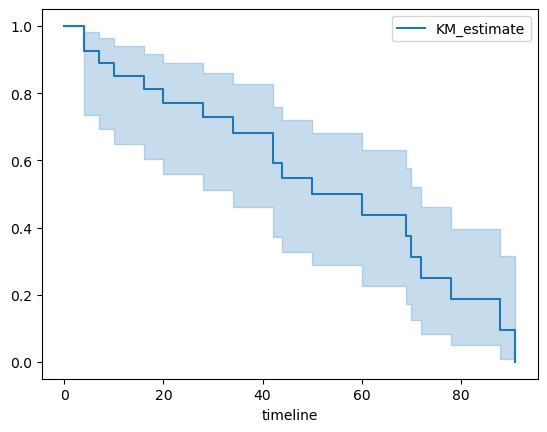

In [24]:
from lifelines import KaplanMeierFitter

# 시간별, 제조사별 생존분석 수행 
# 1이 불량 발생여부니 1을 불량률로 보아도 될 듯

kmf_x = KaplanMeierFitter()
kmf_x.fit(df_x['소요시간'], df_x['불량여부'])
kmf_x.plot()

<AxesSubplot:xlabel='timeline'>

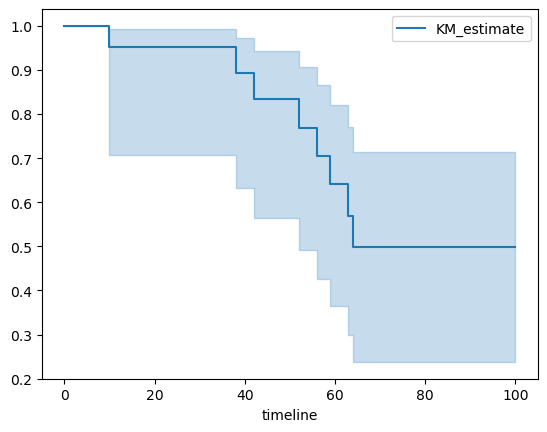

In [25]:
kmf_y = KaplanMeierFitter()
kmf_y.fit(df_y['소요시간'], df_y['불량여부'])
kmf_y.plot()

In [39]:
#  25, 30, 35 개월 불량률 계산

print("x의 25년 후 불량률 : ", round(kmf_x.predict(25), 3))
print("x의 30년 후 불량률 : ", round(kmf_x.predict(30), 3))
print("x의 35년 후 불량률 : ", round(kmf_x.predict(35), 3))
print("\n")
print("y의 25년 후 불량률 : ", round(kmf_y.predict(25), 3))
print("y의 30년 후 불량률 : ", round(kmf_y.predict(30), 3))
print("y의 35년 후 불량률 : ", round(kmf_y.predict(35), 3))

x의 25년 후 불량률 :  0.771
x의 30년 후 불량률 :  0.728
x의 35년 후 불량률 :  0.683


y의 25년 후 불량률 :  0.952
y의 30년 후 불량률 :  0.952
y의 35년 후 불량률 :  0.952


### 1-2) log ranktest를 이용하여 두 제조사별 유의미한 차이가 있는지 검정하라
- 귀무가설 : 두 집단의 생존함수가 동일하다.
- 대립가설 : 두 집단의 생존함수가 동일하지 않다. (두 집단의 생존함수가 차이가 있다.)

In [40]:
# 로그 순위법으로 제조사별 차이 검정
from lifelines.statistics import logrank_test
logrank_test(df_x['소요시간'], df_y['소요시간'], df_x['불량여부'], df_y['불량여부'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.94 0.03      5.25

#### p-value가 0.03으로, 유의수준 0.05보다 작아 귀무가설을 기각한다. 
#### 즉, 두 집단의 생존함수가 동일하지 않다고 할 수 있다.

## < 28회 2번 : 윌콕슨 순위합 검정 / 만 위트니 U검정 >
두 고등학교 성적 분포 차이
- A 고등학교 12명, B 고등학교 24명
- 샘플이 30보다 작음

### 접근 방법
#### 독립 이표본의 비모수 검정
1. 두 고등학교 $\rightarrow$ 이표본, 독립
    - 두 고등학교 모두 샘플이 30개보다 작음
<br></br>
2. B 고등학교에서 정규성 검정을 위해 shapiro test -> p 값이 통계적으로 유의
3. **만 위트니 U검정 / 윌콕슨 순위합 검정(Wilcoxon rank-sum test)** 사용 (얘가 실제 시험 풀이)

- 데이터 없으므로 흐름 참고 !
```Python
# 정규성 검정
print('정규성 검정 상류:', stats.shapiro(df_river['up']))
print('정규성 검정 하류:', stats.shapiro(df_river['down']))
# 결과에 따라 정규성 여부 판단
``` 
- shapiro 정규성 검정 가설
    - 귀무가설 : 정규분포를 따른다.
    - 대립가설 : 정규분포를 따르지 않는다.
<br></br>
- 정규성을 따른다면 독립표본 t검정
- 정규성을 위배한다면 윌콕슨 검정

### 가설
- 귀무가설 : 두 고등학교 성적 분포 차이가 없다.
- 대립가설 : 두 고등학교 성적 분포 차이가 있다.

In [6]:
from scipy.stats import mannwhitneyu

# 두 그룹의 데이터 예시
group1 = [12, 15, 17, 18, 20]
group2 = [10, 11, 14, 16, 19]

# 만 위트니 U 검정 실행
# 제공되는 데이터는 df형식일테니 df["group1"] 이런식으로 넣자
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 18.0
p-value: 0.30952380952380953


In [8]:
from scipy.stats import ranksums

# 두 그룹의 데이터 예시
group1 = [12, 15, 17, 18, 20]
group2 = [10, 11, 14, 16, 19]

# 윌콕슨 순위합 검정 실행
statistic, p_value = ranksums(group1, group2) # 디폴트 양방검정

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1.1489125293076057
p-value: 0.25059205068568424


## < 28회 3번 : 맥니마 검정 - 대응 2표본, 범주형 >
시식 전 후 구매 의도를 가진 사람 비율 차이 검정 (교차표 형식으로 표 그림 제공)
```
[예시 데이터 확인]
              시식_전  시식_후
구매의도_있음     9    12
구매의도_없음    24    35
```

In [50]:
import pandas as pd
 
table = pd.DataFrame([[9,12], [24,35]], 
                     index=["구매의도_있음", "구매의도_없음"], 
                     columns=["시식_전", "시식_후"])
table

,시식_전,시식_후
구매의도_있음,9,12
구매의도_없음,24,35


### 접근 방법
-  2개의 대응 표본을 가지고 범주형 변수의 분포가 변화했는지 검정 : 맥네마

#### Examples
80명을 모집해 프로모션 이벤트를 열고, 이벤트 전후로 상품에 흥미가 있는지를 설문조사하여 얻은 결과가 다음과 같다. 흥미를 갖다가 사라진 사람보다 흥미를 갖지않다가 갖게 된 사람이 더 많았다. 이것이 우연인지 이벤트의 효과인지를 유의수준 0.05로 검정하라.

- 가설
    - H0 : 흥미가 없다가 있게 된 경우와 있다가 없게된 경우는 동일한 확률로 배분된다.
    - H1 : 흥미가 없다가 있게 된 경우와 있다가 없게된 경우는 동일한 확률로 배분되지 않는다.
    

투표권이 있는 나이의 미국인 1,600명에 대해 대통령 지지율을 조사한 결과로, 1st Survey와 2nd Survey는 한 달 간격으로 조사된 데이터이다.
- 가설
    - H0 : 1차 조사와 2차 조사의 Approve, Disapprove **비율은 같다.**
    - H1 : 1차 조사와 2차 조사의 Approve, Disapprove **비율은 다르다.**

### 3-1) 귀무가설과 대립가설을 세우시오.
- 귀무가설 : 시식 전, 후의 구매의도를 가진 사람의 비율은 같다.
- 대립가설 : 시식 전, 후의 구매의도를 가진 사람의 비율은 같지 않다.

### 3-2) 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [56]:
# 라이브러리 검정
from statsmodels.stats.contingency_tables import mcnemar

mc = mcnemar(table.values,
             exact=False, # True -> 이항분포, False -> 카이제곱분포 사용
             correction=False) # correction=False는 연속성 보정 허용 X

print("McNemar's Chi-squared test")
print(mc)

# # 3f 소수점 이하 세자리까지
# print("검정통계량 {:3f}, p-value {:3f}".format(mc.statistic, mc.pvalue))

McNemar's Chi-squared test
pvalue      0.04550026389635857
statistic   4.0


#### p-value가 약 0.0455로 유의수준 0.05보다 작으므로, 귀무가설을 기각한다.
#### 따라서 시식 전, 후의 구매의도를 가진 사람의 비율은 같지 않다고 할 수 있다.

## < 28회 4번 : 편상관분석 >
1. 몸무게 제외 나이와 콜레스테롤 상관계수와 유의확률 구하기 (몸무게를 통제했을 때 콜레스테롤 지수와 나이의 영향이 있을까)
2. 0.05 하에서 검정 결과 제시 하기

In [30]:
# 임의적으로 만든 데이터
data = pd.read_csv("./df_pcor.csv")
data.head()

,age,weight,cholesterol
0,50,62.0,1
1,55,85.0,3
2,52,64.0,3
3,48,82.0,1
4,48,56.0,1


### 접근 방법
#### 편상관분석(Partial Correlation Analysis)
- 상관관계를 보는 것이므로 partial_corr함수에서 x, y 바꿔도 동일한 결과
- 콜레스테를 지수는 3개의 범주

#### 스피어만 상관계수
- 서열 척도로 측정된 데이터와 연속형 데이터 간의 상관계수를 계산 
<br></br>
- 참고 : ANCOVA?
    - 주 목적은 한 개의 '종속 변수를 설명'하기 위해 독립 변수와 공변량(covariate) 간의 관계를 조사하는 것
    - 그래서 본 문제는 '상관관계'라고 명시했으니 편상관분석을 하는게 맞음. 

## 4-1) 몸무게 제외 나이와 콜레스테롤 상관계수와 유의확률 구하기
$\rightarrow$몸무게를 통제했을 때 콜레스테롤 지수와 나이의 영향이 있을까

In [38]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [34]:
import pingouin as pg

pg.partial_corr(data=data, 
                x='age', 
                y='cholesterol', 
                covar='weight', # 제어변수
                method='spearman') # 연속형 x 범주형 = 스피어만

,n,r,CI95%,p-val
spearman,50,0.182556,"[-0.1, 0.44]",0.209303


### 4-2) 0.05 하에서 검정 결과 제시 하기
#### p-value가 0.209303으로, 유의수준 0.05보다 크므로 통계적으로 유의한 상관관계가 없다고 할 수 있다.
#### 즉,  몸무게를 제어했을 때 콜레스테롤 지수와 나이 간의 상관관계는 통계적으로 유의미하지 않다고 할 수 있다.

---

# [ 27회 ]


## < 27회 1번  : 기하평균 >
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오 (반올림하여 소수점 아래 둘째자리까지 표기하라)

### 접근 방법
#### 기하평균
- 인구증가율, 물가상승율, 경제성장률 등과 같이 **연속적인 변화율 데이터를 기반으로 어느 구간에서의 '평균 변화율'을 구할 때 사용**
- **변화율**에 대한 데이터 값 $x_i$ 들을 모두 곱한 후에 데이터의 갯수로 n제곱근을 취한 값

$$ \sqrt[n]{\prod_{k=1}^n x_i} = (x_1 \times x_2 \times \dots \times x_{n-1} \times x_n )^{1/n}$$

- 연평균 성장률 (CAGR, compound annual growth rate)

<img src="https://user-images.githubusercontent.com/119478998/235287878-a16ae605-c2ff-4e4b-abf2-f8031de9ad1e.png" width=500>
<br>
<img src="https://user-images.githubusercontent.com/119478998/235287971-54d3965d-4669-4d9d-9dba-2d420fe12f45.png" width=500>

In [ ]:
p2 = 100000 # 2년 전
p1 = 150000 # 1년 전
p0 = 250000 # 현재

rt1 = (p1/p2) # 10만 -> 15만의 증가율
rt2 = (p0/p1) # 10만 -> 15만의 증가율

# 100% + 평균증가율(%)로 계산돼서 1.xxx %로 나오기 때문에 1을 빼준다.
# -1을 해줌으로써 상승률을 계산
geo_mean = np.sqrt(rt1 * rt2) - 1

print('기하평균:', round(geo_mean * 100, 2), '%')
print('CAGR : ', round(((p0/p2)**(1/2)-1)*100, 2), '%')

설명 참고
```python
# 10만 -> 15만 의 증가율
# => 15/10 = 10/10 + 5/10  = 1 + 0.5 = 100% + 50% = 150%
# 즉 50% 증가했고 이를 비율로 나타내면 1.5 
rt1 = (p1/p2)  

# 10만 -> 15만 의 증가율
# 25/15 = 15/15 + 10/15  = 1 + 0.66 = 100% + 66% = 166%
# 즉 66% 증가했고 이를 비율로 나타내면 1.66
rt2 = (p0/p1) 
```

``` 계산편리를 위해서 p1/p2, p0/p1이 됨
이게 100퍼센트에다가 더한것과 같음
상승'률'이 궁금한 것

ex) 전년대비 120%가 되었다 : 120%가 아니라 20%가 상승, 그래서 100을 빼줌
즉 비율에선 1을 빼주는 것과 같음
```

## < 27회 2번 :  신뢰구간 >
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

### 접근 방법
#### t 분포 사용
- 정규분포를 가정하고, 표본 수가 30건 미만이므로 t-분포를 사용하여 검정

```python
# t-분포를 기반으로 신뢰구간을 계산하는 라이브러리
stats.t.interval(alpha, # 신뢰수준
                 df, # 자유도(degree of freedom)로, t-분포의 형태를 결정하는 매개변수
                 loc=0, # 분포의 평균
                 scale=1) # 분포의 표준편차
```

In [3]:
from scipy import stats

# 라이브러리

mu = 15.5
var = 3.2
n = 12

print('신뢰구간')
print(stats.t.interval(alpha=0.9, 
                       loc=15.5, # 분포의 평균
                       scale = np.sqrt(var/n), # 분포의 표준편차
                       df = n-1))

신뢰구간
(14.572609067393861, 16.427390932606137)


In [6]:
from scipy.stats import t

# t-분포 기반 신뢰구간, 수기 작성

# 표본평균, 표본표준편차, 표본크기
mean = 15.5
std = np.sqrt(3.2)
n = 12

confidence = 0.9

t_value = t.ppf((1 + confidence) / 2, n - 1)
margin_error = t_value * std / np.sqrt(n)

lower_bound = mean - margin_error
upper_bound = mean + margin_error

print(f"t-분포 기반 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]")

t-분포 기반 신뢰구간: [14.57, 16.43]


## < 27회 3번 : paired t-test, 대응표본 t검정 vs. 윌콕슨 부호순위검정 >
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

1. 귀무가설과 대립가설을 세우시오
2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.


In [39]:
df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [40]:
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   River   19 non-null     object 
 1   up      19 non-null     float64
 2   down    19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 584.0+ bytes


### 접근 방법   
#### 1. 데이터 확인 후, 검정방법 결정
- t-분포를 사용하여 검정
- 같은 강, 상/하류간 종속 $\rightarrow$ 대응표본 검정

#### 2. 검정방법의 가정이 만족 하는지 확인
- 표본의 수가 30개 미만인 경우 $\rightarrow$ 정규성검정을 통해 정규성을 입증해야 함
    - t-검정에서는 중심극한정리를 사용하여 정규분포를 가정하기 때문에 표본의 수가 30개 이상 이어야 하기 때문
- 정규성검정이 기각 $\rightarrow$ 비모수적 방법 사용 (윌콕슨 순위합검정)
- 샘플 사이즈가 너무 작은 경우 $\rightarrow$ 정규성 검정 불가능

#### 3. 가정 확인
- 상/하류의 데이터(변수) 각각 정규성 검정
    - shapiro 정규성 검정 H0: 정규분포를 따른다.
    - shapiro 정규성 검정 H1: 정규분포를 따르지 않는다.
<br></br>
- 아래 샘플 데이터는 p값이 둘 다 0.05를 초과하여 정규성을 만족함. $\rightarrow$ paird t-test
- 실제 시험에선 하나가 정규성을 만족하지 못함 => 윌콕슨부호검정 해야함

### 3-1) 귀무가설과 대립가설을 세우시오.
- 귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 대립가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

### 3-2) 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

#### 정규성 검정

In [42]:
print('정규성 검정 상류:', stats.shapiro(df_river['up']))
print('정규성 검정 하류:', stats.shapiro(df_river['down']))

정규성 검정 상류: ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447699666023254)
정규성 검정 하류: ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


#### 이 데이터는 상류, 하류의 p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 않는다.
#### 따라서 정규성을 따른다고 할 수 있고, 대응표본 t-검정을 진행한다.

In [45]:
# 정규성 만족, paired t-test 실행
import scipy.stats as stats
stats.ttest_rel(df_river['up'],df_river['down']) # default two-sided

Ttest_relResult(statistic=1.2922226959983891, pvalue=0.21262429174344777)

#### p-value가 0.21로 유의수준 0.05보다 크므로, 귀무가설을 기각하지 않는다.
#### 따라서 강의 상류와 하류의 생물 다양성 점수에 차이가 없다고 할 수 있다.

### 참고 : 정규성 가정 위배 $\rightarrow$ 윌콕슨 부호검정 

- 둘 중 하나가 정규성을 만족하지 못해
- stats.ttest_rel을 쓰지 못하고, 윌콕슨 부호검정 수행

### 대응표본 검정 => stats.ttest_rel(df_river['up'], df_river['down']))
- 귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 실제 데이터에선 부호검정 결과 p값이 0.05 미만으로 나와 귀무가설을 기각
- 즉, 상-하류간 어류 다양성 점수에 유의미한 차이가 있다.

In [43]:
# 여기선 데이터가 달라서 기각이 안됨
print(stats.wilcoxon(df_river['up'], df_river['down']))

WilcoxonResult(statistic=64.5, pvalue=0.24125289916992188)


## < 27회 4번 : 분위수 회귀분석 (Quntile Regression) >
user_counts를 종속변수로 하는 데이터이다.
1. 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
2. 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [8]:
import pandas as pd
import numpy as np

df_user = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df_user.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


### 접근 방법
#### 분위수 회귀분석 (Quntile Regression)
- Quantile regression은 일반적인 회귀분석에서 종속변수의 조건부 평균 대신 조건부 분위수를 추정하는 방법
- 이 방법은 종속변수와 독립변수 간의 비선형 관계, 이상치 또는 이상치에 민감한 회귀모형을 처리하는 데 유용
<br/>

#### 장점
- 조건부 분위수 추정
    - Quantile regression은 종속변수의 분위수를 추정하므로 종속변수의 분포에 대한 정보를 제공
    - 즉, 회귀모형이 어떤 구간에서 더 불안정한지를 파악 가능
- 이상치에 민감하지 않음
    - 일반적인 회귀분석은 이상치에 민감하게 작동할 수 있음
    - 그러나 Quantile regression은 중앙값과 같은 중심적인 분위수에서 이상치에 대한 영향력이 상대적으로 낮아짐
- 비선형성을 처리할 수 있음
    - 종속변수와 독립변수 간의 비선형 관계가 있는 경우, 일반적인 회귀분석에서는 이를 처리하기 어려움
    - 그러나 Quantile regression은 비선형성을 쉽게 처리 가능
    
<br/>

- 예시
    - 의료 분야: 환자의 진단 결과를 예측하거나 치료의 효과를 예측하는 데 사용
    - 경제학에서는 소득 분포나 소비 패턴을 분석하는 데 사용
    - 기후학에서는 기온이나 강수량의 분포를 예측하는 데 사용.

### 8-1) 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. 
(반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [22]:
# formula를 이용하는 smf.ols()는 자동으로 상수항 가정
import statsmodels.formula.api as smf

# 모델링
formula = 'user_counts ~ temperature + wind + precipitation'
model = smf.quantreg(formula, df_user)
result = model.fit(q=0.5) # 백분위 50%

display(result.summary())
print(result.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Sat, 27 May 2023   No. Observations:                 2097
Time:                        15:39:26   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

Intercept        5941.839469
temperature       268.892015
wind             -129.405013
precipitation     -83.384281
dtype: float64


In [21]:
# intercept가 0부터 시작하므로 회귀계수만 가져오려고 1부터 시작
names = result.params[1:].index    
values = result.params[1:].values 

print('각 회귀 계수. 소수점 2자리 반올림')
print('======='*5)
for name, val in zip(names, values) :
    print(name, ':', round(val, 2))

각 회귀 계수. 소수점 2자리 반올림
temperature : 268.89
wind : -129.41
precipitation : -83.38


### 8-2) 8-1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오.

In [23]:
df_sample = pd.DataFrame(data={'temperature':[10.5], 
                               'wind': [8.2], 
                               'precipitation': [3.5]})

y_predict = result.predict(df_sample)
print('user_counts:', y_predict.values)

user_counts: [7412.23953726]


## < 27회 5번 : Type 3 ANOVA >
지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인 (Type III Anova 사용)
1. 귀무가설과 대립가설을 설정하라
2. 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [5]:
import pandas as pd
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


### 접근 방법
- 상호작용 = 교호작용 $\rightarrow$ 다원분산분석

#### Type 3 ANOVA란?
- **비균형설계자료**의 경우 사용하는 분산분석 방법
- value_counts()로 값들 확인해보고, 비균형설계임을 간단히라도 언급해주자 !
- anova_lm 옵션에 typ=3만 추가해주면 됨

```python
print(anova_lm(model, typ=3))     # type 3 ANOVA
```

In [20]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   line    72 non-null     int64
 1   month   72 non-null     int64
 2   total   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [21]:
df_subway["line"].value_counts()

1    24
2    24
3    24
Name: line, dtype: int64

In [22]:
df_subway["month"].value_counts()

1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: month, dtype: int64

### 5-1) 귀무가설과 대립가설을 설정하라
- 귀무가설(H0) : 지하철 호선과 월별은, 승객 수와 상관관계가 없다.
- 대립가설(H1) : 지하철 호선과 월별은, 승객 수와 상관관계가 있다.


```
가. 상호작용효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설 H1: 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

나. 주효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 지하철 호선 승객 수 차이는 존재한다.

- 귀무가설 H0: 월별 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 월별 승객 수 차이는 존재한다.
```

### 5-2) 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [26]:
import statsmodels.formula.api as smf     
from statsmodels.stats.anova import anova_lm  # anova table을 생성해줌

# 모델링
# 범주형 변수는 C(변수)화 
# = total ~ line + month + line:month  # 모델링 할 때 독립변수 순서 주의!
formula = 'total ~ C(line) * C(month)' 
model = smf.ols(formula, df_subway).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     627.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.18e-41
Time:                        13:45:11   Log-Likelihood:                -244.27
No. Observations:                  72   AIC:                             560.5
Df Residuals:                      36   BIC:                             642.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1316.5000      7.198    182.908      0.000    1301.903    1331.097
C(line)[T.2]                  321.5000     10.179     31.585      0.000     300.856     342.144
C(line)[T.3]                   10.0000     10.179      0.982      0.332     -10.644      30.644
C(month)[T.2]                 -10.0000     10.179     -0.982      0.332     -30.644      10.644
C(month)[T.3]                  -5.0000     10.179     -0.491      0.626     -25.644      15.644
C(month)[T.4]                -110.5000     10.179    -10.856      0.000    -131.144     -89.856
C(month)[T.5]                  -9.0000     10.179     -0.884      0.382     -29.644      11.644
C(month)[T.6]                  -6.0000     10.179     -0.589      0.559     -26.644      14.644
C(month)[T.7]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.8]                 -80.5000     10.179     -7.908      0.000    -101.144     -59.856
C(month)[T.9]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.10]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.11]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.12]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(line)[T.2]:C(month)[T.2]    131.0000     14.395      9.100      0.000     101.805     160.195
C(line)[T.3]:C(month)[T.2]     42.5000     14.395      2.952      0.006      13.305      71.695
C(line)[T.2]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.3]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.2]:C(month)[T.4]    221.0000     14.395     15.352      0.000     191.805     250.195
C(line)[T.3]:C(month)[T.4]    135.5000     14.395      9.413      0.000     106.305     164.695
C(line)[T.2]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.3]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.2]:C(month)[T.6]     86.5000     14.395      6.009      0.000      57.305     115.695
C(line)[T.3]:C(month)[T.6]      3.0000     14.395      0.208      0.836     -26.195      32.195
C(line)[T.2]:C(month)[T.7]    -50.0000     14.395     -3.473      0.001     -79.195     -20.805
C(line)[T.3]:C(month)[T.7]    -37.0000     14.395     -2.570      0.014     -66.195      -7.805
C(line)[T.2]:C(month)[T.8]    201.5000     14.395     13.998      0.000     172.305     230.695
C(line)[T.3]:C(month)[T.8]    112.0000     14.395      7.780      0.000      82.805     141.195
C(line)[T.2]:C(month)[T.9]     20.5000     14.395      1.424      0.163      -8.695      49.695
C(line)[T.3

In [25]:
# type 3 ANOVA 결과
display(anova_lm(model, typ=3))

,sum_sq,df,F,PR(>F)
Intercept,3.466345e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


#### 결과 테이블의 C(line):C(month)를 보면 서로의 차이를 총분산으로 설명하는 F 통계량에 대한 P-value가 0.05보다 작다. 따라서 귀무가설을 기각한다.

#### 즉, 둘의 상관관계(교호작용, 상호작용)는 존재한다고 할 수 있다.

### 참고 : 교호작용 시각화 그래프 

In [27]:
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 

total = df_subway["total"]
line = df_subway["line"]
month = df_subway["month"]

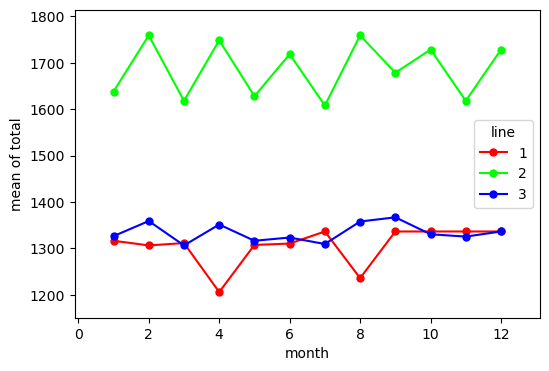

In [33]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(month,line, total,ms=10, ax=ax)

#### 교호작용 그래프 결과 해석
- 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 때, x축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.

---

# [ 26회 ]

## < 26회 1번 : 모비율 관련, 최소 표본 크기 > 
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

### 접근 방법
- 불량률의 추정값이 90%일 것으로 가정하고, 그 추정값의 추정 오차 한계가 5% 이내가 되도록 표본 크기를 결정하라는 의미
- 불량률'의' 90% $\rightarrow$ '모비율' 관련 최소 표본 크기
    - 즉, 여기서 90%는 신뢰계수
- $p$ 를 모르는 경우 ($p$를 아는 경우는, 아래 처럼 표본 크기를 구할 일이 없음)
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/KhNQN7PWRW.jpg" width=650/>

In [46]:
from scipy import stats
from sympy import *
import math

# 표준정규분포 선언
# std_normal = stats.norm(0,1)
# z_val = std_normal.ppf(0.95)

confidence_level = 0.9  # 신뢰수준 (90%)
z_value = norm.ppf(1 - (1 - confidence_level) / 2)  # 임계값 계산

print(z_val) # z_val = 1.645  (신뢰계수 90%)

# 불량률
p = 0.5  # 2차식에서 p=0.5를 넣어야 최소가 됨

# n에 관한 방정식(부등식)
n = Symbol('n')

# 여기서 0.05는 그냥 추정오차한계일 뿐, 신뢰계수 95%가 아님
d = z_val * sqrt(p*(1-p)/n) - 0.05 

# 정답
answer_tmp = solve(d)[0]  # 소수점
answer_final = math.trunc(answer_tmp) + 1  # 소수점 버리고 + 1

print('실제 값: ', answer_tmp)
print('정답: ', answer_final)

# 정답
## 실제 값:  270.554345409541
## 정답:  271

1.6448536269514722
실제 값:  270.554345409541
정답:  271


## < 26회 2번 : 이동평균, 시계열 시각화 > 
아래 그래프는 1월부터 9월까지의 은의 가격이다

<img src="https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png">

1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라
2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

### 접근 방법
- 이동평균값 3은 rolling(window=3).mean() 이용 !

In [21]:
import pandas as pd 
import numpy as np

df = pd.read_csv("../Data/26_problem4.csv")
df

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1M      1 non-null      float64
 1   2M      1 non-null      float64
 2   3M      1 non-null      float64
 3   4M      1 non-null      float64
 4   5M      1 non-null      float64
 5   6M      1 non-null      float64
 6   7M      1 non-null      float64
 7   8M      1 non-null      float64
 8   9M      1 non-null      float64
dtypes: float64(9)
memory usage: 200.0 bytes


### 2-1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [24]:
MA_data = df.transpose() 
MA_data.columns = ["month_price"]
MA_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 은의 가격 데이터의 이동평균값 3 계산
MA_data["MA3"] = MA_data["month_price"].rolling(window=3).mean()
print(MA_data)

    month_price        MA3
1M        12.14        NaN
2M        42.60        NaN
3M        34.40  29.713333
4M        35.29  37.430000
5M        30.96  33.550000
6M        57.12  41.123333
7M        37.84  41.973333
8M        42.49  45.816667
9M        31.38  37.236667


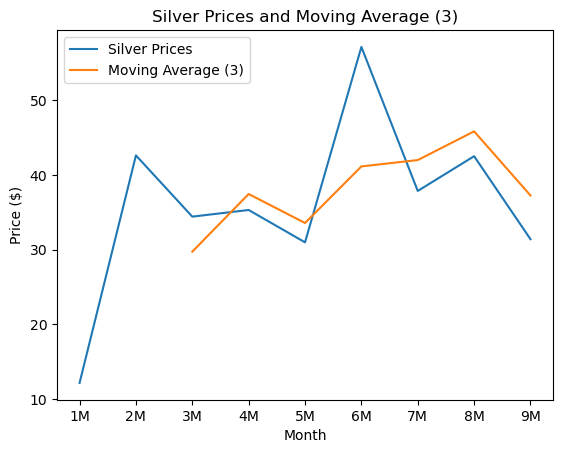

In [28]:
# 시계열 그래프 그리기
fig, ax = plt.subplots()
ax.plot(MA_data["month_price"], label='Silver Prices')
ax.plot(MA_data["MA3"], label='Moving Average (3)')

ax.set_xlabel('Month')
ax.set_ylabel('Price ($)')
ax.set_title('Silver Prices and Moving Average (3)')

ax.legend()
plt.show()

### 2-2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림
- A 대비 B의 증가율 = (B값 - A 값) / A값 * 100

In [29]:
# 1월과 9월의 가격
price_jan = MA_data["month_price"][0]
price_sep = MA_data["month_price"][-1]


# 증감률 계산
# A 대비 B의 증가율 = (B값 - A 값) / A값 * 100
change = (price_sep - price_jan) / price_jan * 100

# 반올림하여 출력
print(round(change, 1))

158.5


## < 26회 3번 : 동질성 검정, 카이제곱 검정 >
아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라
<img src="https://user-images.githubusercontent.com/119478998/237022541-b0af58eb-e31e-4c89-bdab-92b337014a71.png" width=300>

1. 연구가설과 귀무가설을 설정하라
2. 검정통계량 구하고 결론을 내라

### 접근 방법
#### 두 범주형 변수에 대한 검정 $\rightarrow$ 카이제곱
- 자치구별 지지율 동일한지 검정, 즉 행과 행의 관련성이므로 동질성에 가깝다고 생각함

### 3-1) 연구가설과 귀무가설을 설정하라.
- 귀무가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율은 모두 같다.
- 대립가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다.

In [9]:
df = pd.DataFrame({"vote" :["찬성","반대"],
                    "A" : [176,124],
                    "B" : [193,107],
                    "C" : [159,141]})
df 

,vote,A,B,C
0,찬성,176,193,159
1,반대,124,107,141


In [10]:
# 교차표를 만들어 주기 위해 인덱스 설정
df.set_index("vote",inplace=True)
df

,A,B,C
vote,,,
찬성,176,193,159
반대,124,107,141


### 3-2) 검정통계량 구하고 결론을 내라

In [11]:
# 카이제곱 검정을 통한 동질성 검정 수행
from scipy.stats import chi2_contingency

chi2, p, df, expect = chi2_contingency(df) 

# chi2_contingency(df)

print("검정통계량 : ", round(chi2, 5))
print("p-value : ", round(p, 5))

검정통계량 :  7.94538
p-value :  0.01882


#### p-value가 0.01882로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
#### 따라서 A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다고 할 수 있다.

## < 26회 4번 : 독립 표본 t 검정, 신뢰구간 >
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

1. 연구가설과 귀무가설을 설정하라
2. 통계량을 구하고, 연구가설 채택여부를 기술하라.
3. 6.2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [1]:
import pandas as pd

df_pressure = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df_pressure.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


### 접근 방법
#### 독립표본 t 검정
1) gender에 따라 데이터 나누기  
2) 등분산 가정을 만족하므로, 독립표본 t 검정 수행 (equal_var=True 옵션)  


#### 통합 표준편차, 합동(pooled) 표준편차
<img src="https://user-images.githubusercontent.com/119478998/237030782-14056678-dfe7-46b3-98ad-807d0ae334b4.png" width=450>

- 독립표본 t-test에서 두 집단의 분산이 같다고 가정?
    - 두 집단의 표준편차를 결합하여 합동 표준편차(pooled standard deviation)를 구하고 이를 사용하여 통계적 검정 및 신뢰구간을 계산함
<br></br>
- 합동 표준편차는 두 집단의 표준편차를 가중평균한 값
    - 두 집단이 동일한 분산을 가지는 경우, 두 집단에서 추출된 데이터의 분산 추정량의 가중평균이 더 정확한 추정값이 됨
    - 합동 표준편차를 사용하면 두 집단의 분산이 다를 때보다 검정력이 더 좋아짐 
<br></br>
- 합동 표준편차를 사용하여 신뢰구간을 계산하는 이유
    - 두 집단의 분산이 다를 때, 각각의 표준오차를 사용하여 신뢰구간을 계산할 경우 신뢰구간이 과소평가되거나 과대평가될 수 있기 때문
<br></br>
- 두 집단의 분산이 동일 : student's t검정
    - 두 집단의 분산이 다른 경우 : Welch's t-test 등을 사용하여 검정 및 신뢰구간을 계산
    ```python
    # 등분산 만족 X : Welch's t 검정
    ttest_ind(x1, x2, equal_var = False)
    ```
    
#### 신뢰구간
<img src="https://user-images.githubusercontent.com/119478998/237030286-3ee6ed15-624c-4681-ba52-5652399a35c1.png" width=400>


### 4-1) 연구가설과 귀무가설을 설정하라
- 귀무가설 : A학교에서 성별에 따른 평균 혈압 차이는 없다. 
- 대립가설 : A학교에서 성별에 따른 평균 혈압 차이는 있다. 

### 4-2) 통계량을 구하고, 연구가설 채택여부를 기술하라.

In [5]:
# 데이터 나누기 

male = df_pressure.loc[df_pressure.gender == 'male', 'pressure']
female = df_pressure.loc[df_pressure.gender == 'female', 'pressure']

In [3]:
import scipy.stats as stats

# 성별에 따른 혈압이 등분산성을 만족한다는 조건
# 독립 t검정 수행 (default is 'two-sided')
test_result = stats.ttest_ind(male,
                              female,
                              equal_var=True)
test_result

Ttest_indResult(statistic=1.598335024574904, pvalue=0.12361716364314851)

#### p-value 값이 0.12361716364314851로 유의수준 0.05에서 귀무가설을 기각하지 않는다. 
#### 따라서 A학교에서 성별에 따른 평균 혈압 차이는 없다고 할 수 있다.

### 4-3) 4-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [4]:
# 남녀 평균 차이
male.mean() - female.mean()

6.307638888888917

In [ ]:
# 평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
import numpy as np

In [6]:
t_stat, p_val = stats.ttest_ind(male, female, equal_var=True)

# 자유도 계산
df = len(male) + len(female) - 2

# 풀도분산 계산
s1, s2 = male.var(), female.var()
n1, n2 = len(male), len(female)
pooled_var = ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)

# 신뢰구간 계산
# loc은 신뢰구간 계산 시 평균의 차이를 나타내는 값
conf_int = stats.t.interval(0.95,
                            df,
                            loc = male.mean()-female.mean(), 
                            scale = (pooled_var*(1/n1 + 1/n2))**0.5)

print("신뢰구간: ", conf_int)

신뢰구간:  (-1.8560720920085263, 14.47134986978636)


## < 26회 5번 : 베이지안 회귀 >
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
- A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
- 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

5-1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

5-2) 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


### 5-1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

```R
data <- read.csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv")

library(rjags)
library(runjags)

model_string <- "
model {
  # Define variables
  for (i in 1:n) {
    y[i] ~ dnorm(mu[i], tau)
    mu[i] <- beta[1] + beta[2]*x1[i] + beta[3]*x2[i]
  }
  beta[1] ~ dunif(-1000, 1000)  # Improper uniform prior
  beta[2] ~ dunif(-1000, 1000)  # Improper uniform prior
  beta[3] ~ dunif(-1000, 1000)  # Improper uniform prior
  tau ~ dgamma(0.005, 0.005)    # Inverse gamma prior
}
"

# Set seed
set.seed(1234)

# Prepare data
data_jags = list("x1" = data$height,
                 "x2" = data$waist,
                 "y" = data$weight,
                 "n" = nrow(data))

# Run MCMC
jags_model <- jags.model(textConnection(model_string),
                         data = data_jags,
                         n.chains = 3)
update(jags_model, 1000)
samples <- coda.samples(jags_model, variable.names = c("beta", "tau"), n.iter = 10000)

summary(samples)
```

```R
# Output

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 411
   Unobserved stochastic nodes: 4
   Total graph size: 1736

Initializing model

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
> update(jags_model, 1000)
  |**************************************************| 100%
> samples <- coda.samples(jags_model, variable.names = c("beta", "tau"), n.iter = 10000)
  |**************************************************| 100%
> summary(samples)

Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean      SD  Naive SE Time-series SE
beta[1] -26.5886 8.75340 0.0505378        3.03867
beta[2]   0.4824 0.27197 0.0015702        0.07157
beta[3]   0.2143 0.54911 0.0031703        0.12431
tau       0.2491 0.05628 0.0003249        0.01122

2. Quantiles for each variable:

            2.5%      25%      50%      75%   97.5%
beta[1] -42.7128 -32.2536 -26.5532 -19.8254 -9.5844
beta[2]  -0.1515   0.3367   0.5501   0.6677  0.8695
beta[3]  -0.5297  -0.2884   0.1777   0.4790  1.3939
tau       0.1316   0.2135   0.2567   0.2912  0.3410
```

R에서의 다양한 분포 표현
- 정규 분포 (Normal Distribution) : dnorm(mu, sigma)
    - 평균(mu)과 표준 편차(sigma)를 가지는 정규 분포
    - 정규 분포는 연속형 변수에 적합하며, 파라미터의 사후 분포를 모델링하는 데 사용
<br><br/> 
- 베타 분포 (Beta Distribution) : dbeta(alpha, beta)
    - 베이지안 분석에서 0과 1 사이의 값을 가지는 변수의 사후 분포를 모델링하는 데 사용
    - 베타 분포는 성공과 실패의 비율을 모델링하는 데 자주 사용
<br><br/>    
- 감마 분포 (Gamma Distribution) : dgamma(shape, rate)
    - 양의 실수 값을 가지는 변수의 사후 분포를 모델링하는 데 사용
    - 주로 정확도나 정밀도와 같은 변수를 모델링할 때 사용
<br><br/>
- 로지스틱 분포 (Logistic Distribution) : dlogis(location, scale)
    - 양극 첨도(two-tailed) 대칭 분포로, 이산 선택 결과에 적합
    - 주로 이진 분류 문제에서 사후 분포를 모델링하는 데 사용
<br><br/>    
- 카테고리 분포 (Categorical Distribution) : dcat(p)
    - 범주형 변수에 대한 사후 분포를 모델링하는 데 사용
    - 주로 다중 클래스 분류 문제에서 사용

### 5-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

```R
키가 180cm이고 허리둘레가 85cm인 남성의 몸무게를 추정하려면 다음과 같이 계산

mu = beta[1] + beta[2]180 + beta[3]85

# ex : mu = -21.23 + 0.74 * 180 + -0.42 * 85
mu = -26.59 + 0.48180 + 0.2185
mu = 74.14

따라서 추정된 몸무게는 약 74.14
```

---

# [ 25회 ]

- 여러 통계 문제 (각 5점씩 총 20점)

## < 25회 1-1번 : 조화평균 >
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

### 접근 방법
$거리= \cfrac{속도}{시간}$

#### 산술, 기하, 조화 평균
<img src ="https://i.esdrop.com/d/f/3uJKEwVXJL/cqOXmS4V0i.jpg" width=300>

In [17]:
# 거리 = 속도 * 시간

distance = 100  # 이동 거리 (서울에서 영동까지 또는 영동에서 서울까지)

speed1 = 100  # 속도 (서울에서 영동까지)
speed2 = 80  # 속도 (영동에서 서울까지)

# 이동에 소요되는 시간
time1 = distance / speed1  # 서울에서 영동까지의 시간
time2 = distance / speed2  # 영동에서 서울까지의 시간

# 총 이동 거리
total_distance = 2 * distance

# 총 소요 시간
total_time = time1 + time2

# 평균 속도
average_speed = total_distance / total_time

print("평균 속도:", average_speed)

평균 속도: 88.88888888888889


## < 25회 1-2번 : 기하평균 > 
연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

### 접근 방법
성장률과 기하평균
- 27회 1번 문제 유사

In [29]:
p2 = 3000 # 2년 전
p1 = 4000 # 1년 전
p0 = 5000 # 현재

rt1 = (p1/p2) # 10만 -> 15만의 증가율
rt2 = (p0/p1) # 10만 -> 15만의 증가율

geo_mean = np.sqrt(rt1 * rt2)
geo_mean

1.2909944487358056

In [22]:
# 다른 코드 (GPT)

def calculate_average_growth_ratio(revenues):
    # 연평균 증가율 계산
    average_growth_ratio = (revenues[-1] / revenues[0]) ** (1 / (len(revenues) - 1))

    return average_growth_ratio

# 연매출 데이터
revenues = [3000, 4000, 5000]

# 연평균 증가율 계산
average_growth_ratio = calculate_average_growth_ratio(revenues)

# 결과 출력
print(f"연평균 {average_growth_ratio:.2f}배 증가했습니다.")

연평균 1.29배 증가했습니다.


In [21]:
# 시험 다른 복기 데이터) 1000, 2000, 3000일 때

def calculate_average_growth_ratio(revenues):
    # 연평균 증가율 계산
    average_growth_ratio = (revenues[-1] / revenues[0]) ** (1 / (len(revenues) - 1))

    return average_growth_ratio

# 연매출 데이터
revenues = [1000, 2000, 3000]

# 연평균 증가율 계산
average_growth_ratio = calculate_average_growth_ratio(revenues)

# 결과 출력
print(f"연평균 {average_growth_ratio:.2f}배 증가했습니다.")

연평균 1.73배 증가했습니다.


## < 25회 1-3번 : 조건부 확률 >
남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오.
<img src="https://github.com/Datamanim/datarepo/blob/main/adp/25/problem3_3.png?raw=true" width=200/>

In [15]:
import pandas as pd

df_swim = pd.DataFrame([[20, 10], [15,30]],
                       index = ["남자", "여자"],
                       columns = ["등산", "수영"]
                      )
df_swim

,등산,수영
남자,20,10
여자,15,30


In [16]:
male_hiking_count = df_swim.loc["남자", "등산"]
total_male_count = df_swim.loc["남자"].sum()

probability_male_hiking = male_hiking_count / total_male_count

print("남성 중 등산을 좋아할 확률:", probability_male_hiking)


남성 중 등산을 좋아할 확률: 0.6666666666666666


#### 남성 중 등산을 좋아할 확률은 2/3, 즉 0.6666666666666666... 이다. 

## < 25회 1-4번 : 모분산 신뢰구간 추정 >
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

### 접근 방법
- 모분산의 신뢰구간 추정은 카이제곱과 연관 !
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/hhZ8I83b6n.jpg" width=300/>

- 만약 $\sigma^2$의 신뢰수준 95%의 신뢰구간을 구하려면?

$\cfrac{(n-1)s^2}{\chi^2_{0.025}(n-1)} \leq \cfrac{(n-1)s^2}{\chi^2_{0.975}(n-1)}$ 

In [11]:
import numpy as np
from scipy import stats

sample_var = 90  # 표본 분산
sample_size = 10  # 표본 크기
confidence_level = 0.95  # 신뢰도

# 자유도
df = sample_size - 1

# 신뢰구간 계산
lower = df * sample_var / stats.chi2.ppf((1 + confidence_level) / 2, df)
upper = df * sample_var / stats.chi2.ppf((1 - confidence_level) / 2, df)

# 결과 출력
print(f"신뢰구간: ({lower}, {upper})")

신뢰구간: (42.58055444790953, 299.95672846672363)


## < 25회 2번 : paired t-test (대응표본 t검정) >
임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다

1. 귀무가설과 연구가설을 제시하시오.
2. 검정 후 귀무가설 기각 여부 제시

### 접근 방법
- 혈압약 투약 이전, 이후 $\rightarrow$ 대응표본 t검정

#### Paired t-test 검정법
- $u_D$는 영가설이 옳다는 가정하에 0 (귀무가설 : $u_D = 0$)

**1) 통계량과 기각값 비교 : 통계량이 기각역에 포함되는가?**

**2) t기각값, 신뢰구간을 이용한 검정**
- 95% 신뢰구간이 검정하고자 하는 값인 0을 포함한다면, 유의수준 5%에서 영가설을 기각하는 데 실패 (채택)

#### 신뢰구간 유사 문제 : 27회 2번 참고 

### 2-1) 귀무가설과 연구가설을 제시하시오.
- 귀무가설 : 혈압약 투약 이전과 이후의 혈압에 유의한 차이가 없다. (혈압약의 투약여부가 혈압에 대해 유의한 영향을 미치지 못한다.)
- 대립가설 : 혈압약 투약 이전과 이후의 혈압에 유의한 차이가 있다. (혈압약의 투약여부가 혈압에 대해 유의한 영향을 미친다.)

### 2-2) 검정 후 귀무가설 기각 여부 제시

In [17]:
import numpy as np
from scipy import stats

d_bar = 24 
s_d = 9
n = 20

# t 통계량
t = diff / (s_d / np.sqrt(n))
print("t 통계량 : ", t)

confidence_level = 0.95

# t 기각값 계산
t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df=n-1)
print("t 기각값 : ", t_critical )

margin_of_error = t_critical * (s_d / np.sqrt(n))

LCI = d_bar - margin_of_error
HCI = d_bar + margin_of_error

print("신뢰구간 : ", LCI, HCI)

t 통계량 :  11.925695879998878
t 기각값 :  2.093024054408263
신뢰구간 :  19.787870342220813 28.212129657779187


#### t 통계량 값이 기각역에 속하므로, 귀무가설을 기각한다. (기각값인 2.09 < t 값)
#### 신뢰구간 안에 0이 속하지 않으므로,귀무가설을 기각한다. 따라서 혈압약 투약 이전과 이후의 혈압에 유의한 차이가 있다. 

In [8]:
import numpy as np
from scipy import stats

d_bar = 24
s_d = 9
n = 20

# t 통계량
t = d_bar / (s_d / np.sqrt(n))

confidence_level = 0.95

# 양측 검정에서의 t 기각값 계산
t_critical_1 = stats.t.ppf((1 - confidence_level) / 2, df=n-1)
t_critical_2 = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

# 결과 출력
print("t 기각값:", t_critical_1)
print("t 기각값:", t_critical_2)

print("t 통계량:", t)

# 신뢰구간
LCI = d_bar - t_critical_2 * (s_d / np.sqrt(n))
HCI = d_bar + t_critical_2 * (s_d / np.sqrt(n))

print("신뢰구간:", LCI, HCI)


t 기각값: -2.093024054408263
t 기각값: 2.093024054408263
t 통계량: 11.925695879998878
신뢰구간: 19.787870342220813 28.212129657779187


## < 25회 3번 : 크루스컬 윌리스 검정 >
공장 X, Y, Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

1. 귀무가설과 연구가설을 제시하시오
2. 검정 후 귀무가설 기각 여부 제시

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


### 접근 방법 
#### 3개 이상 표본 & '순위'가 들어간 서열 척도 데이터 $\rightarrow$ 크루스컬 윌리스 검정
- 비모수 검정 
- 독립변수는 범주형변수고 종속변수는 연속형변수 $\rightarrow$ One way ANOVA
    - 정규성을 따르면 One way ANOVA로 평균 비교했을 것
    - '중위수'로 비교하므로 정규성을 만족하지 못한다고 판단 $\rightarrow$ 크루스칼로 문제 풀이
    
1. 집단별로 원데이터(출하 소요시간) 분할해주기
    - 순위는 trick
2. 집단별 데이터로 kruskal 검정 실행

###  3-1) 귀무가설과 연구가설을 제시하시오.
- 귀무가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다.
- 대립가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수 중 적어도 하나가 다르다. (적어도 하나는 ~ 차이가 있다.)

## 3-2) 검정 후 귀무가설 기각 여부 제시

In [17]:
from scipy.stats import kruskal

# 각 공장의 데이터 추출
factory_X = df[df['공장명'] == 'X']['출하 소요시간']
factory_Y = df[df['공장명'] == 'Y']['출하 소요시간']
factory_Z = df[df['공장명'] == 'Z']['출하 소요시간']

# 크루스칼-윌리스 검정 수행
statistic, p_value = kruskal(factory_X, factory_Y, factory_Z)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 0.7217886080379153
p-value: 0.6970526702392181


#### p-value 값이 0.697로 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없다.
#### 따라서 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다고 할 수 있다.

## < 25회 4번 : NPV(순현재가치) >
1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

<img src="https://github.com/Datamanim/datarepo/blob/main/adp/25/problem6.png?raw=true" width=300/>

### 접근 방법
- 선형계획법이라고 하는데 솔직히 잘 모르겠음

나름 내가 연구한 방법 
- 할인율이 문제에 주어졌을 것 (10%라고 가정하고 풀이 작성)
- 기준시점을 현재로 잡고 1개년은 1번 할인하고, 2개년은 2번 할인하고, 3년도는 3번 할인
- 원래 시작 기준 연도와 투자금액도 같이 주어져야한다고함. npv 함수 사용하려면 투자금액도 cash_flow에 추가돼서 구현해야하는데 없어서 투자금액 없이 수기로 작성해봄

$1안을\; 예로 \; 들면 \; \cfrac{(50-10)}{1.1} + \cfrac{(60-20)}{(1.1)^2} + \cfrac{(70-15)}{(1.1)^3}=110.7438017$

In [32]:
import pandas as pd

# 할인율
discount_rate = 0.1

# 데이터프레임 생성
investment_df = pd.DataFrame([[10, 20, 15],
                              [15, 14, 19], 
                              [12, 11, 30], 
                              [13, 25, 20], 
                              [16, 30, 24]], 
                             index=[1, 2, 3, 4, 5], 
                             columns=['yr1', 'yr2', 'yr3'])

# investment_df에서 각 값에 대해 50, 60, 70을 뺀 결과를 구함
new_df = pd.DataFrame({
    'yr1': 50 - investment_df['yr1'],
    'yr2': 60 - investment_df['yr2'],
    'yr3': 70 - investment_df['yr3']
}, index=investment_df.index)

# npv 수기작성
for i in range(len(new_df)):
    yr1 = new_df.iloc[i]['yr1']
    yr2 = new_df.iloc[i]['yr2']
    yr3 = new_df.iloc[i]['yr3']

    npv = yr1 / (1 + discount_rate) \
    + yr2 / (1 + discount_rate) ** 2 \
    + yr3 / (1 + discount_rate) ** 3

    new_df.at[new_df.index[i], 'npv'] = npv

print(new_df, "\n")

# 가장 높은 npv를 가지는 예산 선택
max_npv = new_df['npv'].max()
max_index = new_df['npv'].idxmax()

# 결과 출력
print(f"가장 높은 npv를 가지는 것은 {max_index}안이며, npv는 {max_npv:.2f}입니다.")


   yr1  yr2  yr3         npv
1   40   40   55  110.743802
2   35   46   51  108.151766
3   38   49   40  105.093914
4   37   35   50  100.127724
5   34   30   46   90.262960 

가장 높은 npv를 가지는 것은 1안이며, npv는 110.74입니다.


#### 합격자 다른 풀이 참고

In [36]:
from itertools import combinations 
import pandas as pd 

investment_df = pd.DataFrame([[10, 20, 15],
                              [15, 14, 19], 
                              [12, 11, 30], 
                              [13, 25, 20], 
                              [16, 30, 24]], 
                             index=[1, 2, 3, 4, 5], columns=['yr1', 'yr2', 'yr3'])


items = [1, 2, 3, 4, 5]

combination_list = list(combinations(items, 2))+list(combinations(items, 3))

result_df = pd.DataFrame() 

for c in combination_list: 
    
    temp_df = pd.DataFrame()
    for item in items: 
        if item in c: 
            temp_df = pd.concat([temp_df, investment_df.loc[item]], axis=1) 
    
    result_df = pd.concat([result_df, temp_df.sum(axis=1)], axis=1)
    
result_df.columns = combination_list

df_t = result_df.T
df_t = df_t[(df_t['yr1'] < 50) & (df_t['yr2'] < 60) & (df_t['yr3'] < 70)]
df_t['total'] = df_t.sum(axis=1)
df_t.sort_values(by='total', ascending=False)

,yr1,yr2,yr3,total
"(2, 3, 4)",40,50,69,159
"(1, 3, 4)",35,56,65,156
"(1, 2, 4)",38,59,54,151
"(1, 2, 3)",37,45,64,146
"(4, 5)",29,55,44,128
"(3, 5)",28,41,54,123
"(2, 5)",31,44,43,118
"(1, 5)",26,50,39,115
"(3, 4)",25,36,50,111
"(2, 4)",28,39,39,106
